<a href="https://colab.research.google.com/github/rakeshvitta/rakeshvitta/blob/main/Group250_Anamoly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>
<b>Team:</b>

NAVIN APPUKUTTAN NAIR - 2021fc04720

N VISWANATHAN - 2021fc04318

RAKESH VITTA - 2021fc04673

**Dataset:** Anamoly Detection

Location of the Dataset: https://drive.google.com/file/d/1n3hnxH9FPlGJVrbJgXr0fcLpNOvVDJQ-/view?usp=sharing 
</h1>

<h2>Importing Libraries</h2>

In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
import itertools
%matplotlib inline

<h2>Import Dataset into the Notebook</h2>

In [266]:
url = 'https://raw.githubusercontent.com/rakeshvitta/rakeshvitta/main/Anamoly.csv'
df = pd.read_csv(url)

<h1>Data Visualization and Exploration</h1>








<h2>1. Print 2 rows for sanity check</h2>

In [267]:
pd.set_option('display.max_columns', None)
df.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.0,1.0,1.0,0.04,0.06,0.0,255.0,10.0,0.04,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.0,1.0,1.0,0.01,0.06,0.0,255.0,1.0,0.00,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly


In [268]:
df.describe(include = 'all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,22544.000000,22544,22544,22544,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.0,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22531.000000,22532.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544
unique,NaN,3,64,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anomaly
freq,NaN,18880,7853,14875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12833
mean,218.859076,NaN,NaN,NaN,1.039545e+04,2.056019e+03,0.000311,0.008428,0.105394,0.021647,0.442202,0.119899,0.002440,0.000266,0.114665,0.008738,0.001153,0.003549,0.0,0.028433,79.028345,31.124379,0.102924,0.103635,0.238463,0.235179,0.740345,0.094074,0.098110,193.863965,140.752663,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,NaN
std,1407.176612,NaN,NaN,NaN,4.727864e+05,2.121930e+04,0.017619,0.142599,0.928428,0.150328,0.496659,7.269597,0.049334,0.021060,8.041614,0.676842,0.048014,0.067829,0.0,0.166211,128.539248,89.062532,0.295367,0.298332,0.416118,0.416215,0.412496,0.259138,0.253545,94.042593,111.786948,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,NaN
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,NaN,NaN,NaN,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,NaN,NaN,NaN,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,123.250000,16.000000,0.000000,0.000000,0.250000,0.072500,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,NaN


Summary: Based on the above the target matches the dataset loaded here.

<h2>2. Comment on class imbalance with appropriate visualization method.</h2>

In [269]:
#Check the data type of the class and printing the values it takes and counts for each value
df['class'].dtypes
df['class'].value_counts()

anomaly    12833
normal      9711
Name: class, dtype: int64

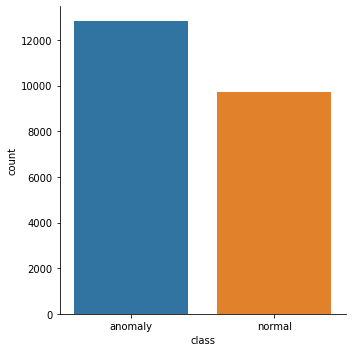

In [270]:
#Looking at the values the dataset is not imbalanced. Visualize the balance:
plot = sns.catplot(x="class", kind="count",  data=df)

From the plot we can see there is no significant imbalance between the classes in the given data set.





<h2>3. Provide appropriate visualizations to get an insight about the dataset.</h2>




> Visualizing different features/columns to see the values and distribution



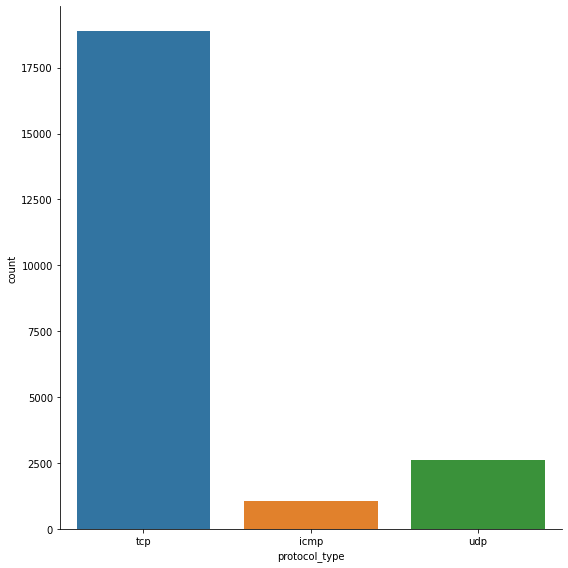

In [271]:
#Checking value counts of feature protocol_type
sns.catplot(x="protocol_type", kind="count",height=8, aspect=1,  data=df);

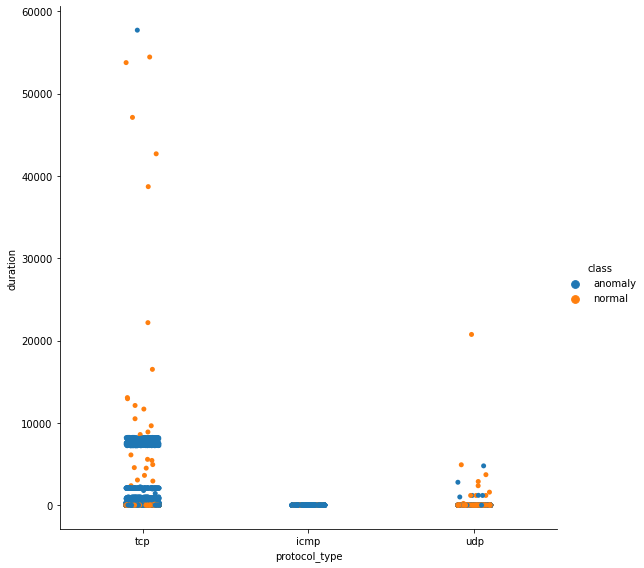

In [272]:
#
sns.catplot(x="protocol_type", y = "duration" ,hue="class",height=8, aspect=1,  data=df);


Based on the above visualization we see that the when the protocol_type is ICMP all classified as "Anamoly" and when protocol_type is TCP and duration is less than 10000 then most of the classification is "Anamoly"

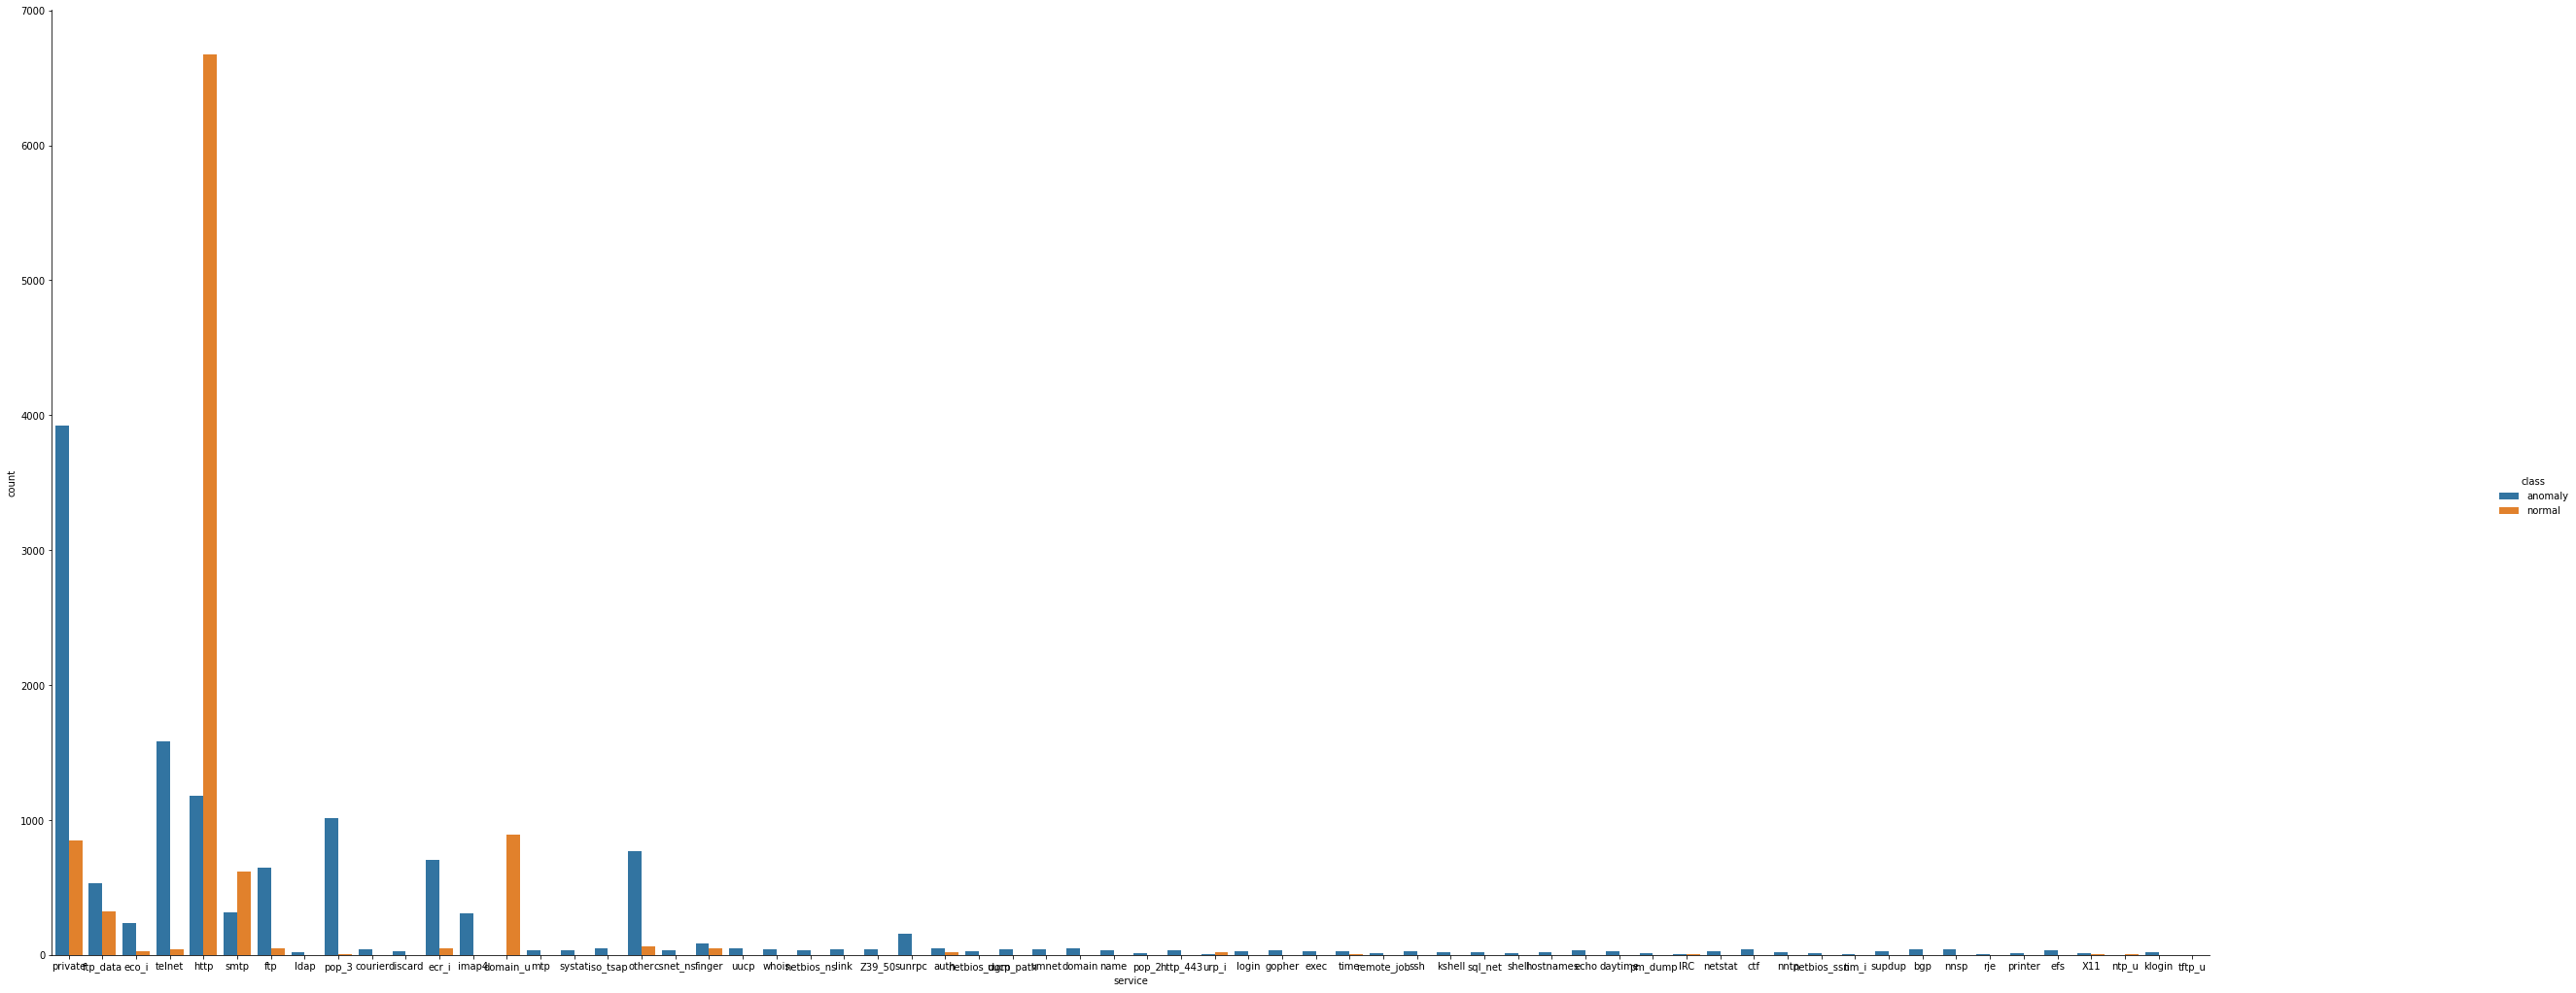

In [273]:
plot = sns.catplot(x="service", kind="count",hue="class",height=8, aspect=1,  data=df);
plot.fig.set_size_inches(40,15)

We do see when service is "http" the classification is mostly "normal" and when the service is "private" or "pop_3" or "telnet" or "iso_tsap" the classification is mostly "anomaly".

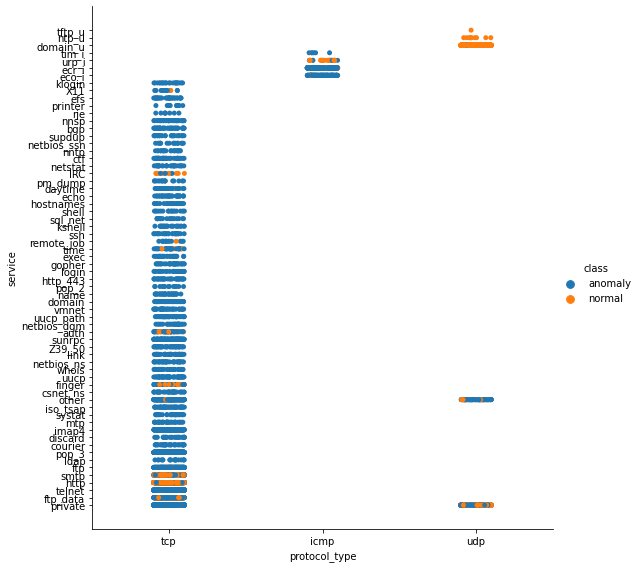

In [274]:
sns.catplot(x="protocol_type", y = "service" ,hue="class",height=8, aspect=1,  data=df);


Above visualization is to see which service for a given protocol_type is classified as "Normal" or "Anomaly".

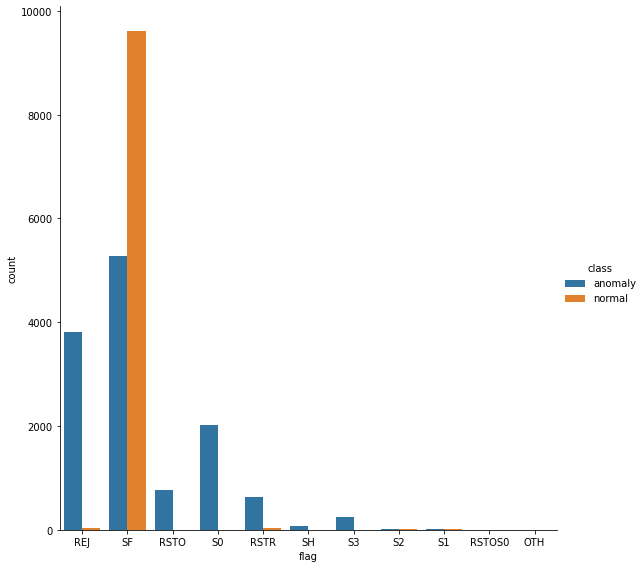

In [275]:
sns.catplot(x="flag", kind="count",height=8, hue="class",aspect=1,  data=df);

Based on above visualization we see that when the flag value is other than SF the data point is classified as "Anomaly"

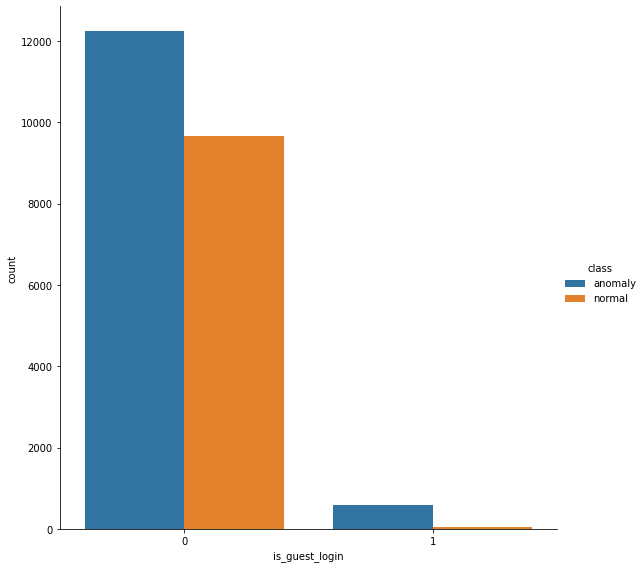

In [276]:
sns.catplot(x="is_guest_login", kind="count",height=8, hue="class", aspect=1,  data=df);


When the "is_guest_login" is 1 the class is "Anomaly"

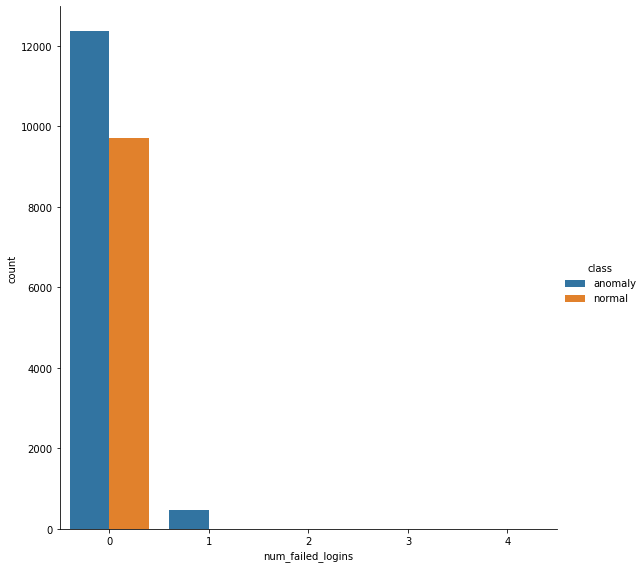

In [277]:
sns.catplot(x="num_failed_logins", kind="count",height=8, hue="class",aspect=1,  data=df);


Based on the above if num_failed_logins is 1 then the clas is "Anomaly"

In [278]:
#Changing the variable type to categorical type and modify them to cat codes
df['protocol_type'] = df['protocol_type'].astype('category')
df['service'] = df['service'].astype('category')
df['flag'] = df['flag'].astype('category')
df['protocol_type'] = df['protocol_type'].cat.codes
df['service'] = df['service'].cat.codes
df['flag'] = df['flag'].cat.codes
df['class'] = df['class'].astype('category')
df["class"] = df["class"].cat.codes


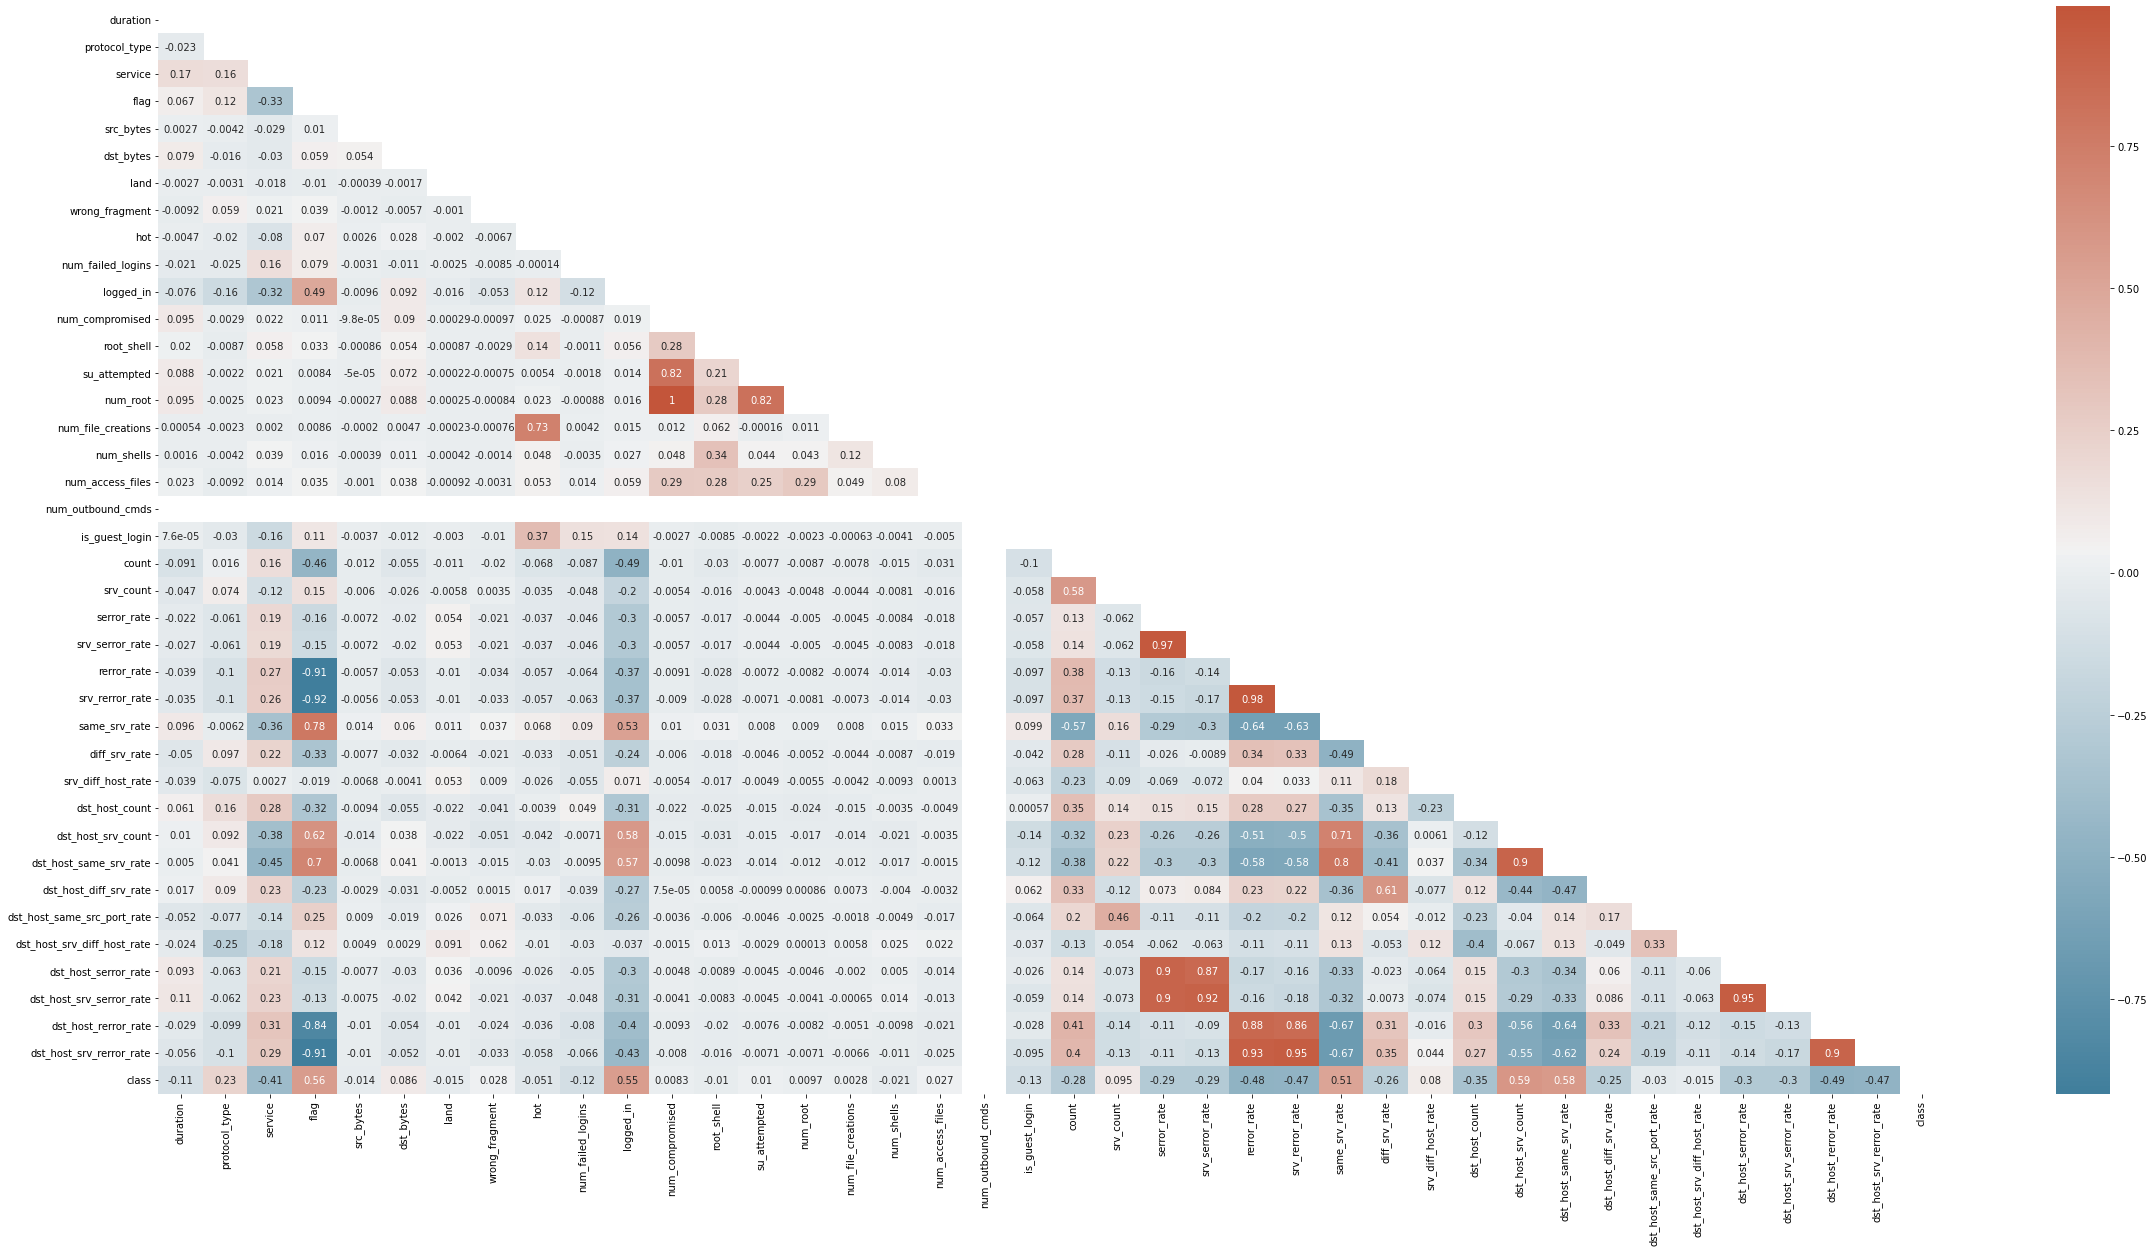

In [279]:
#Correlation Analysis on all the features against each other
cor = df.corr()
f, ax = plt.subplots(figsize=(40, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Generate a mask for upper traingle of the correlation matrix
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor, annot=True, mask=mask, cmap=cmap)

Observations from the Correlation Data:


1.   num_outbound_cmnds columns seems has no values or all zeroes.
2.   Column "srv_rerror_rate" is highly correlated to "dst_host_srv_rerror_rate" (0.95).
3.   Column "srv_serror_rate" is highly correlated to "serror_rate" (0.97).
4.   Column "num_root" is highly correlated to "num_compromised" (1).
5.   Column "srv_rerror_rate" is highly correlated to "rerror_rate" (0.98).
6.   Column "dst_host_serror_rate" is highly correlated to "dst_host_srv_serror_rate" (0.95).





Of the features that are correlated to each other, we find which one is least correlated to the class and we can drop those columns.

In [280]:
print("Class <-> srv_rerror_rate", cor['class'].loc['srv_rerror_rate'])
print("Class <-> dst_host_srv_rerror_rate", cor['class'].loc['dst_host_srv_rerror_rate'])

Class <-> srv_rerror_rate -0.4745468180146622
Class <-> dst_host_srv_rerror_rate -0.47264514466071456


In [281]:
print("Class <-> srv_serror_rate", cor['class'].loc['srv_serror_rate'])
print("Class <-> serror_rate", cor['class'].loc['serror_rate'])

Class <-> srv_serror_rate -0.2931433504308646
Class <-> serror_rate -0.293762806262939


In [282]:
print("Class <-> num_root", cor['class'].loc['num_root'])
print("Class <-> num_compromised", cor['class'].loc['num_compromised'])

Class <-> num_root 0.009652385825925465
Class <-> num_compromised 0.00830128530905602


In [283]:
print("Class <-> srv_rerror_rate", cor['class'].loc['srv_rerror_rate'])
print("Class <-> rerror_rate", cor['class'].loc['rerror_rate'])

Class <-> srv_rerror_rate -0.4745468180146622
Class <-> rerror_rate -0.4810801977407937


In [284]:
print("Class <-> dst_host_serror_rate", cor['class'].loc['dst_host_serror_rate'])
print("Class <-> dst_host_srv_serror_rate", cor['class'].loc['dst_host_srv_serror_rate'])

Class <-> dst_host_serror_rate -0.2987707849483564
Class <-> dst_host_srv_serror_rate -0.3002548926292883


Based on the above observations we can drop the feature columns "dst_host_serror_rate", "num_compromised", "srv_serror_rate", "dst_host_srv_rerror_rate"

In [285]:
df['num_outbound_cmds'].describe()
#All zeroes in this feature and can be removed from the dataset.

count    22544.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_outbound_cmds, dtype: float64

Since the num_outbound_cmds column has no values, we can take this column out of the data set.

<h1> Data Preprocessing and Cleaning </h1>








Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore a few latest data balancing tasks and its effect on model evaluation parameters. 

In [286]:
#Identifying and replacing/dropping null or missing values in the data set
df.isnull().sum()

duration                        0
protocol_type                   0
service                         0
flag                            0
src_bytes                       0
dst_bytes                       0
land                            0
wrong_fragment                  0
hot                             0
num_failed_logins               0
logged_in                       0
num_compromised                 0
root_shell                      0
su_attempted                    0
num_root                        0
num_file_creations              0
num_shells                      0
num_access_files                0
num_outbound_cmds               0
is_guest_login                  0
count                           0
srv_count                       0
serror_rate                     0
srv_serror_rate                 0
rerror_rate                     0
srv_rerror_rate                 0
same_srv_rate                   0
diff_srv_rate                   0
srv_diff_host_rate              0
dst_host_count

In [287]:
#Only the features dst_host_count and dst_host_srv_count have empty values
#Checking the mean,std and max values of the columns which have null/empty values
df['dst_host_count'].describe()

count    22531.000000
mean       193.863965
std         94.042593
min          0.000000
25%        121.000000
50%        255.000000
75%        255.000000
max        255.000000
Name: dst_host_count, dtype: float64

In [288]:
df['dst_host_srv_count'].describe()

count    22532.000000
mean       140.752663
std        111.786948
min          0.000000
25%         15.000000
50%        168.000000
75%        255.000000
max        255.000000
Name: dst_host_srv_count, dtype: float64

In [289]:
#Checking the frequency of values in the columns which have missing values
print(df['dst_host_srv_count'].value_counts())

255.0    7525
1.0      1594
254.0     607
253.0     397
2.0       395
         ... 
202.0      10
112.0      10
207.0      10
205.0       7
0.0         1
Name: dst_host_srv_count, Length: 256, dtype: int64


In [290]:
print(df['dst_host_count'].value_counts())

255.0    14629
1.0        365
2.0        236
3.0        200
4.0        182
         ...  
203.0       10
195.0        7
227.0        7
246.0        7
0.0          1
Name: dst_host_count, Length: 256, dtype: int64


Since the most frequent value/mode has high value we could replace the missing value with the high frequency value/mode.

In [291]:
mode_dst = df['dst_host_count'].mode()[0]
mode_dst_host = df['dst_host_srv_count'].mode()[0]
df_pre = df.copy(deep=True)
df_pre['dst_host_count'].fillna(mode_dst, inplace = True)
df_pre['dst_host_srv_count'].fillna(mode_dst_host, inplace = True)

In [292]:
df_pre['dst_host_count'].describe()

count    22544.000000
mean       193.899219
std         94.026928
min          0.000000
25%        121.000000
50%        255.000000
75%        255.000000
max        255.000000
Name: dst_host_count, dtype: float64

In [293]:
df_pre['dst_host_srv_count'].describe()

count    22544.000000
mean       140.813476
std        111.788256
min          0.000000
25%         15.000000
50%        168.000000
75%        255.000000
max        255.000000
Name: dst_host_srv_count, dtype: float64

<i><b>We observe that the mean and std didnt change by much after replacing the missing values by the mode.</b></i>

In [294]:
#Removing rows with outlier data using the zscore mechanism 
# Looking at the data description, the columns "duration", "src_bytes", "dst_bytes" have high std. 
# Remove the rows that are outside zscore of -3 and 3

zscore = ( df_pre.duration - df_pre.duration.mean() ) / df_pre.duration.std()
df_pre = df_pre.merge(zscore.rename('zscore'),left_index=True, right_index = True)
df_pre = df_pre[(df_pre.zscore>-3) & (df_pre.zscore<3)]
print("Shape of the dataset after removing the outlier rows",df_pre.shape)


Shape of the dataset after removing the outlier rows (22050, 41)


In [295]:
df_pre.drop("zscore",axis = 1, inplace = True)
#Feature - src_bytes
zscore = ( df_pre.src_bytes - df_pre.src_bytes.mean() ) / df_pre.src_bytes.std()
df_pre = df_pre.merge(zscore.rename('zscore'),left_index=True, right_index = True)
df_pre = df_pre[(df_pre.zscore>-3) & (df_pre.zscore<3)]
print("Shape of the dataset after removing the outlier rows",df_pre.shape)


Shape of the dataset after removing the outlier rows (22044, 41)


In [296]:
df_pre.drop("zscore",axis = 1, inplace = True)
#Feature - dst_bytes
zscore = ( df_pre.dst_bytes - df_pre.dst_bytes.mean() ) / df_pre.dst_bytes.std()
df_pre = df_pre.merge(zscore.rename('zscore'),left_index=True, right_index = True)
df_pre = df_pre[(df_pre.zscore>-3) & (df_pre.zscore<3)]
print("Shape of the dataset after removing the outlier rows",df_pre.shape)


Shape of the dataset after removing the outlier rows (22002, 41)


In [297]:
#Removing the zscore column before we run the model on the dataset
df_pre.drop("zscore",axis = 1, inplace = True)
print(df_pre.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


In [298]:
#Removing columns that have high correlation from the dataset. 
#Based on the observation from Correlation analysis, removing the columns dst_host_serror_rate", "num_compromised", "srv_serror_rate", "dst_host_srv_rerror_rate" and "num_outbound_cmds"
df_pre.drop(['dst_host_serror_rate'], axis = 1, inplace = True)
df_pre.drop(['num_compromised'], axis = 1, inplace = True)
df_pre.drop(['srv_serror_rate'], axis = 1, inplace = True)
df_pre.drop(['dst_host_srv_rerror_rate'], axis = 1, inplace = True)
df_pre.drop(['num_outbound_cmds'], axis = 1, inplace = True)


In [299]:
df_pre

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,class
0,0,1,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,1.0,1.0,0.04,0.06,0.00,255.0,10.0,0.04,0.06,0.00,0.00,0.0,1.00,0
1,0,1,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,1.0,1.0,0.01,0.06,0.00,255.0,1.0,0.00,0.06,0.00,0.00,0.0,1.00,0
2,2,1,19,9,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,1.00,0.00,0.00,134.0,86.0,0.61,0.04,0.61,0.02,0.0,0.00,1
3,0,0,13,9,20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.0,0.0,1.00,0.00,1.00,3.0,57.0,1.00,0.00,1.00,0.28,0.0,0.00,0
4,1,1,55,2,0,15,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,1.0,0.5,1.00,0.00,0.75,29.0,86.0,0.31,0.17,0.03,0.02,0.0,0.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,1.00,0.00,0.00,100.0,141.0,0.72,0.06,0.01,0.01,0.0,0.00,1
22540,0,1,22,9,317,938,0,0,0,0,1,0,0,0,0,0,0,0,2,11,0.0,0.0,0.0,1.00,0.00,0.18,197.0,255.0,1.00,0.00,0.01,0.01,0.0,0.00,1
22541,0,1,22,9,54540,8314,0,0,2,0,1,0,0,0,0,0,0,0,5,10,0.0,0.0,0.0,1.00,0.00,0.20,255.0,255.0,1.00,0.00,0.00,0.00,0.0,0.07,0
22542,0,2,11,9,42,42,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.0,0.0,1.00,0.00,0.33,255.0,252.0,0.99,0.01,0.00,0.00,0.0,0.00,1


df_pre here is the pre-processed, feature engineered and clean dataset on which the model could be built.

<h1> Model Building </h1>


1.   Split the dataset into training and test sets. Answers without justification will not be awarded marks. ❌

Case 1 :   Train = 80 % Test = 20%  [ x_train1,y_train1] = 80% ; 

   [ x_test1,y_test1] = 20% ; 

Case 2 :   Train = 10 % Test = 90%  [ x_train2,y_train2] = 10% ; 

[ x_test2,y_test2] = 90%  

2.   Explore k-fold cross validation. ❌
3. Model the classifier using GaussianNB, BernoulliNB, and Multinomial NB.  
4. Explore the need of regularization and incorporate few relevant techniques for the problem statement. ❌
5. Compare models with and without regularization in a tabular format and justify the findings. ❌



In [300]:
df_pre.describe(include = 'all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,class
count,22002.000000,22002.000000,22002.000000,22002.000000,2.200200e+04,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000
mean,38.784838,1.071584,31.142123,6.826152,5.633455e+03,1487.652941,0.000318,0.008636,0.107263,0.022180,0.450914,0.002318,0.000091,0.026498,0.008954,0.001182,0.003409,0.029134,80.946050,31.853877,0.104084,0.243796,0.240204,0.734132,0.096041,0.099728,192.847423,140.557949,0.608726,0.089826,0.135163,0.020058,0.093147,0.235817,0.438369
std,209.975851,0.401593,14.028338,3.232249,3.219117e+04,4458.346759,0.017834,0.144338,0.937598,0.152129,0.497596,0.048091,0.009534,1.616856,0.685127,0.048602,0.064927,0.168185,129.523601,90.029137,0.296724,0.419264,0.419330,0.415518,0.261407,0.255211,94.482133,112.424053,0.438398,0.220855,0.309084,0.086369,0.279887,0.390300,0.496198
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,22.000000,5.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.180000,0.000000,0.000000,117.000000,14.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,22.000000,9.000000,1.050000e+02,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,166.000000,0.950000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,45.000000,9.000000,2.900000e+02,622.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,127.000000,16.000000,0.000000,0.477500,0.330000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.390000,1.000000
max,3702.000000,2.000000,63.000000,10.000000,1.262796e+06,60530.000000,1.000000,3.000000,101.000000,4.000000,1.000000,1.000000,1.000000,173.000000,100.000000,5.000000,4.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [301]:
X = df_pre.iloc[:, 0:34]
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_rerror_rate
0,0,1,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,1.0,1.0,0.04,0.06,0.00,255.0,10.0,0.04,0.06,0.00,0.00,0.0,1.00
1,0,1,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,1.0,1.0,0.01,0.06,0.00,255.0,1.0,0.00,0.06,0.00,0.00,0.0,1.00
2,2,1,19,9,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,1.00,0.00,0.00,134.0,86.0,0.61,0.04,0.61,0.02,0.0,0.00
3,0,0,13,9,20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.0,0.0,1.00,0.00,1.00,3.0,57.0,1.00,0.00,1.00,0.28,0.0,0.00
4,1,1,55,2,0,15,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,1.0,0.5,1.00,0.00,0.75,29.0,86.0,0.31,0.17,0.03,0.02,0.0,0.83


In [302]:
y = df_pre.iloc[:, 34:35]
y.dtypes

class    int8
dtype: object

In [303]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_rerror_rate
0,0,1,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,1.0,1.0,0.04,0.06,0.00,255.0,10.0,0.04,0.06,0.00,0.00,0.0,1.00
1,0,1,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,1.0,1.0,0.01,0.06,0.00,255.0,1.0,0.00,0.06,0.00,0.00,0.0,1.00
2,2,1,19,9,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,1.00,0.00,0.00,134.0,86.0,0.61,0.04,0.61,0.02,0.0,0.00
3,0,0,13,9,20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.0,0.0,1.00,0.00,1.00,3.0,57.0,1.00,0.00,1.00,0.28,0.0,0.00
4,1,1,55,2,0,15,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,1.0,0.5,1.00,0.00,0.75,29.0,86.0,0.31,0.17,0.03,0.02,0.0,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,1.00,0.00,0.00,100.0,141.0,0.72,0.06,0.01,0.01,0.0,0.00
22540,0,1,22,9,317,938,0,0,0,0,1,0,0,0,0,0,0,0,2,11,0.0,0.0,0.0,1.00,0.00,0.18,197.0,255.0,1.00,0.00,0.01,0.01,0.0,0.00
22541,0,1,22,9,54540,8314,0,0,2,0,1,0,0,0,0,0,0,0,5,10,0.0,0.0,0.0,1.00,0.00,0.20,255.0,255.0,1.00,0.00,0.00,0.00,0.0,0.07
22542,0,2,11,9,42,42,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.0,0.0,1.00,0.00,0.33,255.0,252.0,0.99,0.01,0.00,0.00,0.0,0.00


In [304]:
y

,class
0,0
1,0
2,1
3,0
4,0
...,...
22539,1
22540,1
22541,0
22542,1


In [348]:
from sklearn.preprocessing import normalize

X_normalized = normalize(X, norm='l2', axis=0, copy=True, return_norm=False)
X_normalized1 = normalize(X, norm='l2', axis=1, copy=True, return_norm=False)


Note: Below we can use either X or X_normalized. X has preprocessed clean data set and not normalized. X_normalized is normalized dataset with axis =0 and X_normalized1 is normalized dataset with axis =1. With X and X_normalized Multinomial is either predicting all classes as 0 or 1. With X_normalzed1 multinomial gives good results.

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized1, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17601, 34), (4401, 34), (17601, 1), (4401, 1))

In [350]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [351]:
gnb = GaussianNB()
gnb.fit(X_train, y_train.to_numpy().reshape(-1))
print("Naive Bayes score: ",gnb.score(X_test, y_test))

Naive Bayes score:  0.8177686889343331


In [352]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train.to_numpy().reshape(-1))
print("Bernoulli Bayes score: ",bnb.score(X_test, y_test))

Bernoulli Bayes score:  0.8793456032719836


In [353]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train.to_numpy().reshape(-1))
print("Multinomial Bayes score: ",mnb.score(X_test, y_test))

Multinomial Bayes score:  0.8161781413315156


In [354]:
y_test.value_counts()

class
0        2461
1        1940
dtype: int64

In [355]:
y_train.value_counts()

class
0        9896
1        7705
dtype: int64

In [356]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = BernoulliNB()
cv_results = cross_val_score(clf, X, y.to_numpy().reshape(-1), cv=k_fold)
print(cv_results)
print(cv_results.mean())

[0.87687415 0.86915039 0.86227273 0.87409091 0.86772727 0.87954545
 0.87136364 0.86772727 0.87909091 0.87318182]
0.8721024534302589


In [357]:
#K-Fold cross validation scores for GaussianNB classifier
#k_fold_gaussian = KFold(n_splits=10, shuffle=True, random_state=0)
clf_g = GaussianNB()
#cv_g_results = cross_val_score(clf_g, X, y.to_numpy().reshape(-1), cv=k_fold_gaussian)
cv_g_results = cross_val_score(clf_g, X, y.to_numpy().reshape(-1), cv=k_fold)
print(cv_g_results)
print(cv_g_results.mean())

[0.83689232 0.83007724 0.81318182 0.84090909 0.81772727 0.82590909
 0.83545455 0.82181818 0.82318182 0.83818182]
0.8283333195654867


In [358]:
#K-Fold cross validation scores for MultinomialNB classifier
kfold_multi = KFold(n_splits=10, shuffle=True, random_state=0)
clf_m = MultinomialNB()
cv_m_results = cross_val_score(clf_m, X, y.to_numpy().reshape(-1), cv=kfold_multi)
print(cv_m_results)
print(cv_m_results.mean())

[0.51158564 0.51431168 0.48772727 0.48772727 0.48136364 0.49818182
 0.49681818 0.51090909 0.48181818 0.51136364]
0.4981806410309364


<h1> Performance Evaluation </h1>


1.   Do the prediction for the test data and display the results for the inference. Calculate all the evaluation metrics and choose best for your model. Justify your answer. Answers without justification will not be awarded marks. ❌ 
2. Comment on underfitting/overfitting/just right model. Justify your comment. 
Answers without justification will not be awarded marks. ❌




In [359]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

In [360]:
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

def plot_confusion_matrix(conf_mat):
  with plt.style.context(('ggplot', 'seaborn')):
      fig = plt.figure(figsize=(6,6), num=1)
      plt.imshow(conf_mat, interpolation='nearest',cmap= plt.cm.Blues )
      plt.xticks([0,1],[0,1])
      plt.yticks([0,1],[0,1])
      plt.xlabel('Predicted Label')
      plt.ylabel('Actual Label')
      for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
                  plt.text(j, i,conf_mat[i, j], horizontalalignment="center",color="red")
      plt.grid(None)
      plt.title('Confusion Matrix')
      plt.colorbar();

In [361]:
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred_test)
print(f"Naive Bayes model accuracy = {accuracy_score(y_test, y_pred_test)}")
print(f"Naive Bayes model accuracy train = {accuracy_score(y_train, y_pred_train)}")
print(f"Precision Score = {precision_score(y_test, y_pred_test)}")
print(f"Recall Score = {recall_score(y_test, y_pred_test)}")
print(f"F1 Score = {f1_score(y_test, y_pred_test)}")
#print(classification_report(y_test, y_pred_test))

Naive Bayes model accuracy = 0.8177686889343331
Naive Bayes model accuracy train = 0.8202374865064485
Precision Score = 0.718342287029931
Recall Score = 0.9649484536082474
F1 Score = 0.8235811702595689


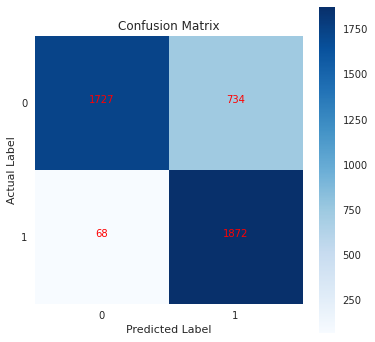

In [362]:
plot_confusion_matrix(conf_mat)

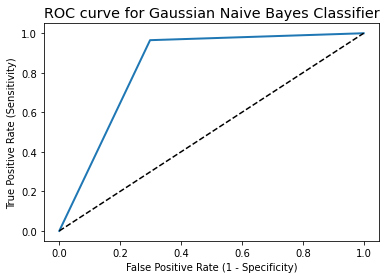

In [363]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

The accuracy of train and test data is very similar so it is not over or under-fitted. 

In [364]:
y_pred_train = bnb.predict(X_train)
y_pred_test = bnb.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred_test)
print(f"Bernoulli model accuracy = {accuracy_score(y_test, y_pred_test)}")
print(f"Bernoulli model accuracy train = {accuracy_score(y_train, y_pred_train)}")
print(f"Precision Score = {precision_score(y_test, y_pred_test)}")
print(f"Recall Score = {recall_score(y_test, y_pred_test)}")
print(f"F1 Score = {f1_score(y_test, y_pred_test)}")
#print(classification_report(y_test, y_pred_test))

Bernoulli model accuracy = 0.8793456032719836
Bernoulli model accuracy train = 0.8706891653883302
Precision Score = 0.8218364550022842
Recall Score = 0.927319587628866
F1 Score = 0.8713974327924436


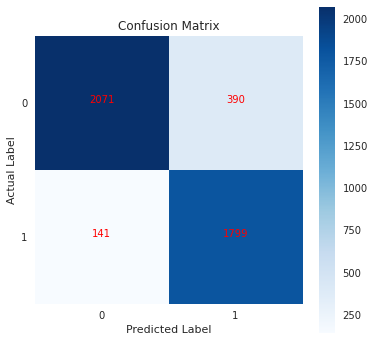

In [365]:
plot_confusion_matrix(conf_mat)

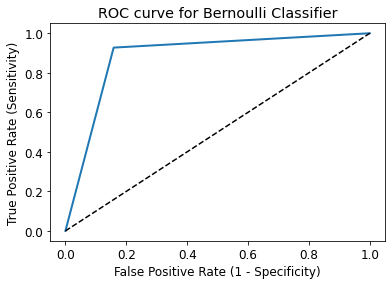

In [366]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Bernoulli Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

The accuracy of train and test data is very similar so it is not over or under-fitted.

In [367]:
y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred_test)
print(f"Multinomial model accuracy = {accuracy_score(y_test, y_pred_test)}")
print(f"Multinomial model accuracy train = {accuracy_score(y_train, y_pred_train)}")
print(f"Precision Score = {precision_score(y_test, y_pred_test)}")
print(f"Recall Score = {recall_score(y_test, y_pred_test)}")
print(f"F1 Score = {f1_score(y_test, y_pred_test)}")
#print(classification_report(y_test, y_pred_test))

Multinomial model accuracy = 0.8161781413315156
Multinomial model accuracy train = 0.8214874154877564
Precision Score = 0.8078388677191073
Recall Score = 0.7649484536082474
F1 Score = 0.7858088429970876


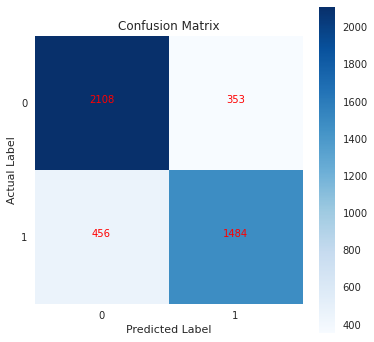

In [368]:
plot_confusion_matrix(conf_mat)

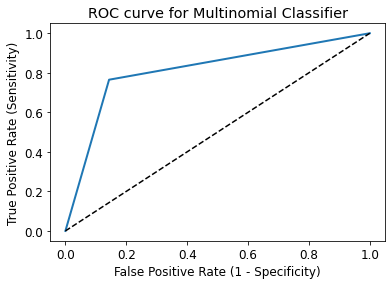

In [369]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Multinomial Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

The accuracy of train and test data is very similar so it is not over or under-fitted.